In [1]:
# Importing the required libraries
# Loading the train/test data
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [2]:
print('Size of training set')
print(train.shape)

Size of training set
(4209, 378)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
# Separating y column as this is for prediction output
y_train = train['y'].values
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [5]:
# A lot of columns that have an X 
# Let's check for the same 
# 376 features with X
columns_x = [c for c in train.columns if 'X' in c]

# info about columns_x
print(len(columns_x))
print(train[columns_x].dtypes.value_counts())

376
int64     368
object      8
dtype: int64


In [6]:
# Looking at the test dataset for simiilar features
test = pd.read_csv('test.csv')
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
print('Size of testing set')
test.shape

Size of testing set


(4209, 377)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [9]:
# Creating the final dataset
# Removing unwanted columns (ID); y has been removed earlier
final_column = list(set(train.columns) - set(['ID', 'y']))

x_train = train[final_column]
# x_train
x_test = test[final_column]
# x_test

In [10]:
# Searching for null values
# Creating a function for the same
def detect(df):
    if df.isnull().any().any():
        print("Yes")
    else:
        print("No")

detect(x_train)
detect(x_test)

# Observation : There are no missing values.

No
No


In [11]:
## EDA
# Integer Columns Analysis
unique_value_dict = {}
for col in x_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(x_train[col].unique()).tolist())
        t_list = unique_value_dict.get(unique_value, [])
        t_list.append(col)
        unique_value_dict[unique_value] = t_list[:]
for unique_val, columns in unique_value_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("-----------------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X327', 'X221', 'X319', 'X147', 'X60', 'X261', 'X272', 'X48', 'X364', 'X310', 'X262', 'X242', 'X307', 'X23', 'X122', 'X326', 'X140', 'X69', 'X348', 'X36', 'X24', 'X137', 'X128', 'X114', 'X292', 'X12', 'X211', 'X370', 'X139', 'X126', 'X163', 'X57', 'X384', 'X298', 'X275', 'X340', 'X83', 'X158', 'X331', 'X29', 'X376', 'X79', 'X172', 'X59', 'X198', 'X84', 'X260', 'X349', 'X270', 'X314', 'X174', 'X87', 'X97', 'X187', 'X363', 'X105', 'X143', 'X119', 'X344', 'X21', 'X145', 'X333', 'X304', 'X345', 'X256', 'X265', 'X244', 'X117', 'X73', 'X219', 'X232', 'X63', 'X288', 'X194', 'X227', 'X278', 'X329', 'X82', 'X358', 'X120', 'X313', 'X267', 'X130', 'X197', 'X144', 'X162', 'X342', 'X295', 'X55', 'X146', 'X179', 'X39', 'X367', 'X207', 'X299', 'X65', 'X106', 'X218', 'X254', 'X335', 'X153', 'X324', 'X212', 'X365', 'X251', 'X239', 'X123', 'X385', 'X203', 'X343', 'X110', 'X273', 'X320', 'X33', 'X118', 'X151', 'X234', 'X338', 'X257', 'X50', 'X104', 'X362', 

In [12]:
# Removal of columns with a variance of 0
# means columns that have only one unique value 0. 

for column in final_column:
    check = len(np.unique(x_train[column]))
    if check == 1:
        x_train.drop(column, axis = 1, inplace=True) 
        x_test.drop(column, axis = 1, inplace=True)

x_train.head()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,X327,X221,X319,X147,X60,X261,X272,X48,X364,X310,...,X70,X91,X155,X316,X161,X135,X372,X62,X236,X67
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
## Label encoding the Categorical columns
from sklearn import preprocessing
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[f].values)) 
        x_train[f] = lbl.transform(list(x_train[f].values))
        #x_test[f] = lbl.transform(list(x_test[f].values))   ## as values in test dataset differs from train set

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


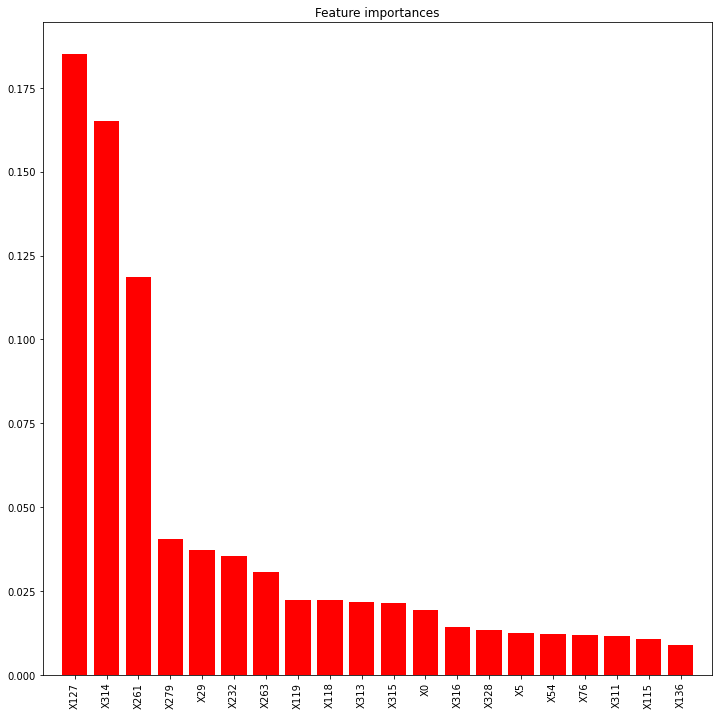

In [14]:
## Let us build a Random Forest model and check the important variables.

from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, 
                                       max_depth=10, min_samples_leaf=4, 
                                       max_features=0.2, n_jobs=-1, 
                                       random_state=0)
model.fit(x_train, y_train)
feat_names = x_train.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [15]:
# Performing dimensionality reduction with principal components analysis
from sklearn.decomposition import PCA
n_comp = 12
pca = PCA(n_components = n_comp, random_state = 42)
pca_result_train = pca.fit_transform(x_train)
#pca_result_test = pca.transform(x_test)

In [16]:
print(pca_result_train)

[[  0.6147646   -0.13300945  15.62446002 ...   1.73755444   0.28954921
    0.35785984]
 [  0.56540665   1.56033294  17.9095812  ...  -0.13646131   0.76263999
   -0.36526988]
 [ 16.20171258  12.29284626  17.6335395  ...  -0.48541502  -1.03733932
    3.90820317]
 ...
 [ 29.00466039  14.86090532  -7.75333217 ...  -1.09582032   1.40188416
   -0.35863787]
 [ 22.97242171   1.68482437  -9.03124768 ...   0.2551764    1.27434357
   -1.10530813]
 [-17.28304831  -9.95198181  -3.71935977 ...   0.28687286   0.43209916
   -0.71581723]]


In [17]:
# ML Modeling with XGboost
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Splitting the data by 80/20
x_train, x_valid, y_train, y_valid = train_test_split(pca_result_train, 
                                                      y_train, 
                                                      test_size = 0.2, 
                                                      random_state = 42)

In [18]:
#Building the final feature set
f_train = xgb.DMatrix(x_train, label = y_train)
f_valid = xgb.DMatrix(x_valid, label = y_valid)

#f_test = xgb.DMatrix(pca_result_test)

## DMatrix is an internal data structure that is used by XGBoost, 
## which is optimized for both memory efficiency and training speed.

In [19]:
# Setting the parameters for XGB
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02  ## eta means learning rate
params['max_depth'] = 4

In [20]:
# Predicting the score
# Creating a function for the same

def scorer(m, w):
    labels = w.get_label()
    return 'r2', r2_score(labels, m)

final_set = [(f_train, 'train'), (f_valid, 'valid')]

P = xgb.train(params, f_train, 1000, final_set, early_stopping_rounds=50, feval=scorer, maximize=True, verbose_eval=10)

[05:00:56] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.99704	valid-rmse:98.88675	train-r2:-59.49743	valid-r2:-61.82424
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.14532	valid-rmse:81.05431	train-r2:-39.64615	valid-r2:-41.20883
[20]	train-rmse:66.60017	valid-rmse:66.52771	train-r2:-26.38061	valid-r2:-27.43520
[30]	train-rmse:54.76085	valid-rmse:54.72092	train-r2:-17.51112	valid-r2:-18.23791
[40]	train-rmse:45.14306	valid-rmse:45.11907	train-r2:-11.57983	valid-r2:-12.07891
[50]	train-rmse:37.35343	valid-rmse:37.35661	train-r2:-7.61298	valid-r2:-7.96573
[60]	train-rmse:31.07077	valid-rmse:31.08922	train-r2:-4.95932	valid-r2:-5.20970
[70]	train-rmse:26.02810	valid-rmse:26.04551	train-r2:-3.18194	valid-r2:-3.35830
[80]	train-rmse:22.00455	valid-rmse:22.02654	train-r2:-1.98894	valid-r2:-2.

In [21]:
# Predicting on test set
#p_test = P.predict(f_test)
p_test = P.predict(f_valid)
p_test

array([ 92.380516,  96.87317 , 102.63961 ,  79.52145 , 111.19188 ,
       102.04098 ,  92.50556 , 102.59639 , 103.01943 , 114.29949 ,
        76.812996,  96.22807 ,  97.06306 , 103.23583 ,  96.50993 ,
        95.65269 , 109.42547 ,  96.95768 ,  95.31575 , 115.81218 ,
       115.048935,  98.09499 ,  96.29528 , 101.184555,  93.54596 ,
       111.295784,  95.74774 ,  78.02805 ,  93.40679 ,  94.59314 ,
        94.9714  , 102.12881 ,  97.09997 , 108.764366,  98.11215 ,
       112.43154 , 112.5981  ,  99.23213 ,  92.68921 ,  98.60684 ,
       115.00515 , 102.15974 , 119.03843 , 108.80348 ,  96.233765,
       102.10781 ,  91.61071 , 104.24238 , 109.48014 , 104.69695 ,
        94.691986,  99.373886, 103.494156, 107.18817 ,  99.898315,
       101.20604 ,  98.488914, 111.42259 ,  96.03088 ,  97.47106 ,
       108.82083 ,  76.582085,  95.11354 ,  95.813095,  77.74773 ,
        98.07238 ,  95.34091 , 100.15635 , 104.69695 ,  99.4338  ,
        94.152504,  95.11163 ,  98.906784, 106.004364,  96.354

In [22]:
Predicted_Data = pd.DataFrame()
Predicted_Data['y'] = p_test
Predicted_Data.head()

,y
0,92.380516
1,96.873169
2,102.639610
3,79.521446
4,111.191879
